In [1]:
import pandas as pd
import os
output_dir = 'PBT_files'

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    print('folder created')
    os.makedirs(output_dir)

df = pd.read_csv('ProdByTech.csv')
print('read')
for i in df['YEAR'].unique():
    print(i)
    df1 = df.loc[df['YEAR'] == i]
    outputpath =  os.path.join(output_dir, str(str(i)+'.xlsx'))
    print(outputpath)
    df1.to_excel(outputpath, index=False)


read
2023
PBT_files\2023.xlsx
2024
PBT_files\2024.xlsx
2025
PBT_files\2025.xlsx
2026
PBT_files\2026.xlsx
2027
PBT_files\2027.xlsx
2028
PBT_files\2028.xlsx
2029
PBT_files\2029.xlsx
2030
PBT_files\2030.xlsx
2031
PBT_files\2031.xlsx
2032
PBT_files\2032.xlsx
2033
PBT_files\2033.xlsx
2034
PBT_files\2034.xlsx
2035
PBT_files\2035.xlsx
2036
PBT_files\2036.xlsx
2037
PBT_files\2037.xlsx
2038
PBT_files\2038.xlsx
2039
PBT_files\2039.xlsx
2040
PBT_files\2040.xlsx
2041
PBT_files\2041.xlsx
2042
PBT_files\2042.xlsx
2043
PBT_files\2043.xlsx
2044
PBT_files\2044.xlsx
2045
PBT_files\2045.xlsx
2046
PBT_files\2046.xlsx
2047
PBT_files\2047.xlsx
2048
PBT_files\2048.xlsx
2049
PBT_files\2049.xlsx


In [1]:
df = pd.read_csv('ProdByTech.csv')
print('read')
# for i in df['YEAR'].unique():
#     print(i)
#     df1 = df.loc[df['YEAR'] == i]
#     outputpath =  os.path.join(output_dir, str(str(i)+'.xlsx'))
#     print(outputpath)
#     df1.to_excel(outputpath, index=False)


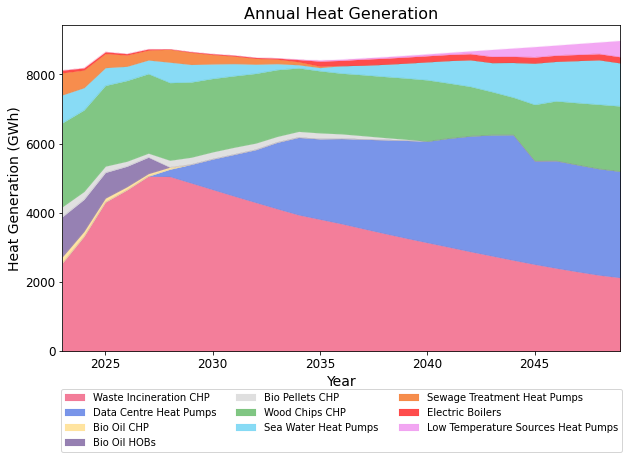

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
Names={
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
}
PBTA = pd.read_csv('ProdByTechAnn.csv')
PBTA = PBTA.loc[PBTA['FUEL'].str.contains('CONVHEAT', case=False, na=False)]
pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
pivot_PBTA = (pivot_PBTA * 0.27777778).round(0)
pivot_PBTA.index.name = None
pivot_PBTA_reset = pivot_PBTA.reset_index()
pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)
grouped_data = {}
for category, columns in Names.items():
    # Sum the values for the specified columns in each category
    grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data)
grouped_df.insert(0, 'Year', pivot_PBTA_reset['Year'])  # Keep the 'Year' column
grouped_df.set_index('Year', inplace=True)

colorblind_colors = plt.get_cmap('tab10').colors

# Create a dictionary to map technologies to colors
technology_colors = {
    'Waste Incineration CHP': colorblind_colors[0],
    'Data Centre Heat Pumps': colorblind_colors[1],
    'Bio Oil CHP': colorblind_colors[2],
    'Bio Oil HOBs': colorblind_colors[3],
    'Bio Pellets CHP': colorblind_colors[4],
    'Wood Chips CHP': colorblind_colors[5],
    'Sea Water Heat Pumps': colorblind_colors[6],
    'Sewage Treatment Heat Pumps': colorblind_colors[7],
    'Electric Boilers': colorblind_colors[8],  # Can use an additional color if needed
    'Low Temperature Sources Heat Pumps': colorblind_colors[9],  # Optional
}

technology_colors1 = {
    'Waste Incineration CHP': '#D32F2F',  # Bright Red
    'Data Centre Heat Pumps': '#4169E1',   # Bright Blue
    'Bio Oil CHP': '#388E3C',              # Bright Green
    'Bio Oil HOBs': '#FBC02D',             # Bright Yellow
    'Bio Pellets CHP': '#8E24AA',          # Bright Purple
    'Wood Chips CHP': '#F57C00',           # Bright Orange
    'Sea Water Heat Pumps': '#0288D1',      # Bright Sea Blue
    'Sewage Treatment Heat Pumps': '#B0BEC5', # Light Grey
    'Electric Boilers': '#FF5722',         # Deep Orange
    'Low Temperature Sources Heat Pumps': '#FFD600'  # Bright Gold
}

technology_colors5 = {
    'Electric Boilers': '#FF0000',          # Coral Red
    'Data Centre Heat Pumps': '#4169E1',    # Turquoise
    'Bio Oil CHP': '#FFDA79',               # Bright Yellow
    'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
    'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
    'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
    'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
    'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
    'Waste Incineration CHP': '#EF476F',    # Pinkish Red
    'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
}


# Plot area graph
ax = grouped_df.plot(kind='area', alpha=0.7, figsize=(10, 6),
                      color=[technology_colors5[col] for col in grouped_df.columns], linewidth=0.1,)



# Remove edge colors by making them transparent
for patch in ax.patches:
    patch.set_edgecolor('black')  # Set edge color to transparent
    patch.set_linewidth(0)               # Ensure linewidth is 0
# Overlay with semi-transparent white to create a gloss effect
for patch in ax.patches:
    patch.set_facecolor(patch.get_facecolor())
    # Adding gloss effect with a semi-transparent white layer
    gloss = plt.Rectangle((patch.get_x(), patch.get_y() + patch.get_height() * 0.5), 
                          patch.get_width(), patch.get_height() * 0.5, 
                          color='white', alpha=0.5, zorder=10)
    ax.add_patch(gloss)

# Add labels and title
plt.title('Annual Heat Generation', fontsize=16)
plt.xlabel('Year', fontsize=14)  # Corrected to 'Year'
plt.ylabel('Heat Generation (GWh)', fontsize=14)
plt.legend(title='Technologies')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2023, 2049)

# Move the legend to the bottom as a horizontal box
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

plt.grid(False)

# Show plot
plt.savefig('PBTA.jpg', bbox_inches='tight', dpi=800)
plt.show()